<a href="https://colab.research.google.com/github/saonemasi-oss/test/blob/main/Copy_of_ECS7020P_miniproject_2526_400dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author

**Student Name**: SAWAN MASIH NAYAK

**Student ID**: 250885248

# Task
- I build a machine learning model that predicts a song title from a 10‑second hum or whistle using the dataset at `/content/drive/MyDrive/MLEndHWII_sample_400`.
- I preprocess the audio, extract Mel-Frequency Cepstral Coefficients (MFCCs), then train and evaluate a Convolutional Neural Network (CNN) on these features.
- I present everything in a concise report that walks you through the problem setup, methodology, implemented machine learning pipeline, dataset creation, experimental results, plus the final conclusions.


## Mount Google Drive

Mount Google Drive to make the dataset accessible from the specified path `/content/drive/MyDrive/MLEndHWII_sample_400`. This is the first step to access the dataset.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Verify Dataset Path and Contents


- I first check that the dataset path `/content/drive/MyDrive/MLEndHWII_sample_400` exists and that it is a valid directory.
- Then I list everything inside this folder to confirm that it contains the expected `.wav` audio files plus to see whether any metadata files like `metadata.csv` are present.
- To verify the dataset path and list its contents, I need to import the `os` module, define the dataset path, and then use `os.path.exists()`, `os.path.isdir()`, and `os.listdir()` to check and display its contents.


In [2]:
import os

dataset_base_path = '/content/drive/MyDrive/MLEndHWII_sample_400'

if os.path.exists(dataset_base_path) and os.path.isdir(dataset_base_path):
    print(f"Dataset path '{dataset_base_path}' exists and is a directory.")
    contents = os.listdir(dataset_base_path)
    print("Contents of the dataset directory:")
    for item in contents:
        print(f"- {item}")
else:
    print(f"Error: Dataset path '{dataset_base_path}' does not exist or is not a directory.")

Dataset path '/content/drive/MyDrive/MLEndHWII_sample_400' exists and is a directory.
Contents of the dataset directory:
- S125_hum_1_Feeling.wav
- S155_hum_4_Feeling.wav
- S154_hum_1_Feeling.wav
- S72_whistle_2_Feeling.wav
- S144_whistle_1_Feeling.wav
- S65_hum_2_Feeling.wav
- S7_hum_1_Feeling.wav
- S159_whistle_2_Feeling.wav
- S43_whistle_1_Feeling.wav
- S5_hum_2_Feeling.wav
- S61_hum_1_Feeling.wav
- S115_whistle_2_Feeling.wav
- S96_hum_1_Feeling.wav
- S127_whistle_2_Feeling.wav
- S150_whistle_1_Feeling.wav
- S79_whistle_2_Feeling.wav
- S89_hum_1_Feeling.wav
- S114_whistle_1_Feeling.wav
- S167_hum_4_Feeling.wav
- S143_hum_2_Feeling.wav
- S126_hum_4_Feeling.wav
- S180_whistle_2_Feeling.wav
- S139_whistle_2_Feeling.wav
- S95_hum_3_Feeling.wav
- S82_hum_1_Feeling.wav
- S83_whistle_2_Feeling.wav
- S18_whistle_1_Feeling.wav
- S69_hum_2_Friend.wav
- S165_whistle_2_Feeling.wav
- S56_hum_1_Feeling.wav
- S114_whistle_1_Friend.wav
- S59_hum_3_Friend.wav
- S107_whistle_2_Friend.wav
- S184_whist

## Generate/Load Metadata DataFrame


- This project constructs a metadata DataFrame programmatically because the MLEnd Hums and Whistles subset does not include a readymade metadata.csv file.

- All items in the dataset folder are scanned, only files with extension .wav are retained, and their full paths are recorded; these paths define the raw input items of the dataset.

- Each filename is parsed to extract two attributes: a label indicating the vocalisation type (hum or whistle) and the song identifier (for example Married, Happy, or RememberMe). These act as target labels for later supervised classification.

- Three parallel lists are collected: full audio file paths (predictors), vocalisation labels, and song names.

- These lists are combined into a pandas DataFrame with columns audiofile, label, and songname, which provides the tabular dataset representation used by the rest of the machine learning pipeline.

In [3]:
import pandas as pd

audio_files = []
labels = []
song_names = []

for filename in contents:
    if filename.endswith('.wav'):
        full_path = os.path.join(dataset_base_path, filename)
        audio_files.append(full_path)

        # Extract label (hum/whistle) and song name
        parts = filename.split('_')
        label = parts[1]  # 'hum' or 'whistle'
        song_name = parts[-1].split('.')[0]  # 'Married', 'Happy', etc.
        labels.append(label)
        song_names.append(song_name)

metadata_df = pd.DataFrame({
    'audio_file': audio_files,
    'label': labels,
    'song_name': song_names
})

print("Metadata DataFrame head:")
print(metadata_df.head())
print("\nMetadata DataFrame info:")
metadata_df.info()

Metadata DataFrame head:
                                          audio_file    label song_name
0  /content/drive/MyDrive/MLEndHWII_sample_400/S1...      hum   Feeling
1  /content/drive/MyDrive/MLEndHWII_sample_400/S1...      hum   Feeling
2  /content/drive/MyDrive/MLEndHWII_sample_400/S1...      hum   Feeling
3  /content/drive/MyDrive/MLEndHWII_sample_400/S7...  whistle   Feeling
4  /content/drive/MyDrive/MLEndHWII_sample_400/S1...  whistle   Feeling

Metadata DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   audio_file  400 non-null    object
 1   label       400 non-null    object
 2   song_name   400 non-null    object
dtypes: object(3)
memory usage: 9.5+ KB


## Load and Explore Metadata
- I start by checking how many unique classes there are for both `label` and `songname` in `metadata_df`, along with their counts.
- Verified that the dataset is balanced by confirming there are 2 label types (`hum` and `whistle`) and 8 song names, each appearing the same number of times.
- Looked for any missing values in each column to make sure the metadata is clean and complete.
- Checked the total number of rows in `metadata_df` to confirm that every audio file in the dataset has a corresponding metadata entry.


In [4]:
print("Number of unique labels:", metadata_df['label'].nunique())
print("Number of unique song names:", metadata_df['song_name'].nunique())

print("\nDistribution of labels:")
print(metadata_df['label'].value_counts())

print("\nDistribution of song names:")
print(metadata_df['song_name'].value_counts())

print("\nMissing values per column:")
print(metadata_df.isnull().sum())

print("\nTotal number of audio files (rows in DataFrame):")
print(len(metadata_df))

Number of unique labels: 2
Number of unique song names: 8

Distribution of labels:
label
hum        201
whistle    199
Name: count, dtype: int64

Distribution of song names:
song_name
Feeling          50
Friend           50
Happy            50
Married          50
Necessities      50
NewYork          50
RememberMe       50
TryEverything    50
Name: count, dtype: int64

Missing values per column:
audio_file    0
label         0
song_name     0
dtype: int64

Total number of audio files (rows in DataFrame):
400


## Problem Formulation

- I predict a song title from a 10-second hum or whistle using machine learning.
- Human performance varies every time. Pitch, tempo, plus rhythm shift.
- Background noise and personal interpretation distort the signal.
- Audio data is high-dimensional, so finding the melody is like searching in a noisy crowd.


The core machine learning problem in this project is to predict the title of a song given a 10-second audio recording of a human humming or whistling that song. This falls under the domain of audio classification and content-based music retrieval.

This is a challenging yet highly interesting problem for several reasons:

- Human humming and whistling vary widely in pitch, tempo, loudness, and phrasing, so recordings of the same song can sound very different, which makes generalization difficult for a model.
- Realworld recordings often contain background noise (speech, ambient sounds, room effects) that can mask the melody and corrupt the features used for classification.

- Different people subjectively emphasize or omit parts of the tune, so clips that share a label may encode slightly different musical ideas even though they represent the same song.
- Raw audio is highdimensional and temporal, so meaningful representations require specialized time,frequency features (such as MFCCs or spectrograms) and sequential models like CNN or RNN based architectures.

- Solving this problem advances audio understanding and supports real applications, including query by humming music identification, content based retrieval in music libraries, assistive tools for music learning, and creative systems driven by vocal input.

## Methodology
- I treat this as a supervised multiclass classification problem: given a 10 second hum or whistle, predict which of eight songs it corresponds to using a CNN on MFCC features.
- My pipeline has four main stages: data preprocessing, MFCC feature extraction, CNN training with validation, and final evaluation on a held out test set.
- Trained the CNN by minimising categorical cross entropy on the training set and monitor a separate validation set to tune hyperparameters and apply early stopping to reduce overfitting.
- Used MFCCs because they give a compact, perceptually meaningful time frequency representation that the CNN can more easily learn patterns from than raw waveforms.
- For evaluation, I use overall accuracy as the main metric (since the song classes are balanced) and also compute per class precision, recall, and F1 to see how well each song is recognised.
- Included a confusion matrix to inspect which songs are most often confused, so I can analyse specific weaknesses of the model beyond the aggregate scores.


## Implemented ML Prediction Pipelines
- The implemented ML prediction pipeline takes raw 10 second hummed or whistled WAV audio files as input and outputs a predicted song title from a fixed set of eight categories.
- In the data preprocessing stage, each file is loaded, resampled to a common sampling rate, trimmed for leading and trailing silence, normalised, and padded or truncated to exactly 10 seconds, yielding standardised 1D NumPy waveforms.
- In the transformation stage, Mel Frequency Cepstral Coefficients (MFCCs) are computed from each waveform, producing 2D MFCC matrices of shape \(n\_mfcc \times \text{frames}\) that capture timbral and spectral characteristics, which are then padded to a common frame length and reshaped into 4D tensors \((\text{samples}, \text{frames}, n\_mfcc, 1)\) suitable for CNN input.
- In the model stage, these MFCC tensors are passed through a Convolutional Neural Network composed of stacked Conv2D, MaxPooling2D, Dropout, Flatten, and Dense layers, which learns discriminative time frequency patterns and produces a softmax probability distribution over song classes; the most likely song label is taken as the prediction, optionally together with the full probability vector.
- Intermediate data structures therefore transition from file paths and metadata, to preprocessed 1D audio arrays, to 2D MFCC feature maps, to 4D CNN input tensors, and finally to 1D probability vectors and discrete class predictions, using a single CNN based pipeline without ensembles to provide a clear, well defined baseline system.


## Data Preprocessing and Augmentation

- All audio files are preprocessed to a common format so that the model receives signals with consistent sampling rate, duration, and basic cleaning.
- Each WAV file is loaded with Librosa at a fixed sampling rate (e.g., 22050 Hz), trimmed for leading and trailing silence, and then truncated or zero padded to exactly 10 seconds, yielding 1D NumPy arrays of equal length.
- These standardized waveforms are then ready for MFCC feature extraction, ensuring compatible input shapes for the CNN.
- No data augmentation (such as pitch shifting, time stretching, or adding noise) is applied in the current pipeline, but this is noted as a potential future extension to improve robustness and effective dataset size.


## Dataset Preprocessing and Augmentation

- Each audio file is loaded and resampled to a common target sampling rate (`TARGET_SR`), and leading and trailing silence are removed with `librosa.effects.trim()` to standardize the signal and focus on relevant content.
- The trimmed audio is then truncated or zero‑padded so that every clip is exactly 10 seconds (`AUDIO_DURATION`), producing fixed‑length sequences required by the CNN.
- These processed waveforms are stored (for example, in a Python list of NumPy arrays) and used as the input for subsequent MFCC feature extraction.
- Each audio file is loaded and resampled to a common target sampling rate (`TARGET_SR`), and leading and trailing silence are removed with `librosa.effects.trim()` to standardize the signal and focus on relevant content.
- The trimmed audio is then truncated or zero‑padded so that every clip is exactly 10 seconds (`AUDIO_DURATION`), producing fixed‑length sequences required by the CNN.
- These processed waveforms are stored (for example, in a Python list of NumPy arrays) and used as the input for subsequent MFCC feature extraction.

In [5]:
import librosa
import numpy as np

# Initialize a list to store preprocessed audio samples
preprocessed_audio_samples = []

# Define target sampling rate and audio duration (already defined in kernel state, but good for clarity)
TARGET_SR = 22050
AUDIO_DURATION = 10 # seconds

# Calculate the target number of samples for 10 seconds of audio
target_samples = TARGET_SR * AUDIO_DURATION

for audio_file_path in metadata_df['audio_file']:
    # 5a. Load the audio file, ensuring it's resampled to TARGET_SR
    audio, sr = librosa.load(audio_file_path, sr=TARGET_SR)

    # 5b. Use librosa.effects.trim() to remove leading and trailing silence
    trimmed_audio, _ = librosa.effects.trim(audio, top_db=20)

    # 5d. Truncate if longer than target_samples
    if len(trimmed_audio) > target_samples:
        processed_audio = trimmed_audio[:target_samples]
    # 5e. Pad with zeros if shorter than target_samples
    elif len(trimmed_audio) < target_samples:
        padding_needed = target_samples - len(trimmed_audio)
        processed_audio = np.pad(trimmed_audio, (0, padding_needed), 'constant')
    else:
        processed_audio = trimmed_audio

    # Ensure the processed audio has the exact target_samples length
    assert len(processed_audio) == target_samples, f"Audio length mismatch for {audio_file_path}"

    # 5f. Append the processed audio to the list
    preprocessed_audio_samples.append(processed_audio)

print(f"Finished preprocessing {len(preprocessed_audio_samples)} audio files.")
print(f"Example preprocessed audio shape: {preprocessed_audio_samples[0].shape}")

Finished preprocessing 400 audio files.
Example preprocessed audio shape: (220500,)


## Transformation Stage

- For the transformation stage, Mel-frequency Cepstral Coefficients (MFCCs) are used as the primary audio features, representing each 10 second clip as a 2D time frequency matrix that summarizes its spectral envelope over time.

- MFCCs are chosen because they approximate human auditory perception via the Mel scale, emphasize the vocal frequency range, and compactly encode the spectral shape shaped by the vocal tract, which is highly relevant for distinguishing different hummed or whistled melodies.
- They significantly reduce the dimensionality of raw waveforms while retaining key timbral and melodic cues, and have a long track record of strong performance in speech and music information retrieval tasks, making them a natural fit for hum/whistle-based song classification.



### Mel-frequency Cepstral Coefficients (MFCCs)

- For the feature extraction stage, Mel-frequency Cepstral Coefficients (MFCCs) are used as the primary audio features.
- MFCCs are widely adopted in speech and audio processing and are particularly well-suited to human vocalizations such as humming and whistling, making them a natural choice for this task.

### Rationale for Selecting MFCCs:

- MFCCs are grounded in the Mel scale, which approximates human auditory perception by emphasizing lower, speech relevant frequencies and compressing higher ones, making them well suited to distinguishing vocal patterns.
- They compactly encode the spectral envelope shaped by the vocal tract, offer some robustness to noise and speaker variability, and reduce the dimensionality of raw waveforms while retaining information that has been proven effective in many speech and music retrieval tasks.

## MFCC Implementation

- MFCC extraction is implemented by choosing a fixed number of coefficients (for example `n_mfcc = 40`) and iterating over the list of preprocessed 10 second waveforms.[1]
- For each waveform, `librosa.feature.mfcc(y=audio_sample, sr=TARGET_SR, n_mfcc=n_mfcc)` is called to produce a 2D MFCC array, which is appended to a list.
- After processing all samples, the code scans this list to find the maximum number of time frames (the second dimension of each MFCC array), which is then used later to pad or truncate MFCCs so every input to the CNN has a consistent frame length.

In [6]:
n_mfcc = 40
mfccs_list = []

for audio_sample in preprocessed_audio_samples:
    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio_sample, sr=TARGET_SR, n_mfcc=n_mfcc)
    mfccs_list.append(mfccs)

# Determine the maximum number of frames
max_frames = 0
for mfcc_array in mfccs_list:
    if mfcc_array.shape[1] > max_frames:
        max_frames = mfcc_array.shape[1]

print(f"Shape of MFCCs for the first audio sample: {mfccs_list[0].shape}")
print(f"Maximum number of frames across all MFCCs: {max_frames}")

Shape of MFCCs for the first audio sample: (40, 431)
Maximum number of frames across all MFCCs: 431


## Dataset Creation for ML Pipelines

- MFCC feature matrices are first standardized to a common temporal length by padding shorter arrays with zeros or truncating longer ones to the previously determined `max_frames`, ensuring every sample has the same number of time steps.
- The padded MFCCs are stacked into a NumPy array `X` and reshaped into 4D tensors of shape `(samples, frames, n_mfcc, 1)` so they can be used as CNN inputs.
- Corresponding song titles from the metadata are label encoded into integer class IDs using `LabelEncoder`, producing a 1D target array `y` and defining the number of classes.
- Finally, `train_test_split` is used in two stages: first to create a training set and a temporary set, and then to split the temporary set into validation and test sets, yielding tensors with shapes `X_train (280, 431, 40, 1)`, `X_val (60, 431, 40, 1)`, and `X_test (60, 431, 40, 1)` and corresponding label vectors.


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Standardize the length of all MFCC feature matrices
X_padded = []
for mfcc_array in mfccs_list:
    if mfcc_array.shape[1] < max_frames:
        # Pad with zeros if shorter
        padding_needed = max_frames - mfcc_array.shape[1]
        padded_mfcc = np.pad(mfcc_array, ((0, 0), (0, padding_needed)), 'constant')
    elif mfcc_array.shape[1] > max_frames:
        # Truncate if longer (should not happen if max_frames was correctly determined)
        padded_mfcc = mfcc_array[:, :max_frames]
    else:
        padded_mfcc = mfcc_array
    X_padded.append(padded_mfcc)

# 2. Reshape the MFCC data for CNN input
X = np.array(X_padded)
# Reshape to (number_of_samples, max_frames, n_mfcc, 1)
X = X.transpose(0, 2, 1) # Change from (samples, n_mfcc, frames) to (samples, frames, n_mfcc)
X = X[..., np.newaxis] # Add channel dimension

# 3. Encode song names into numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(metadata_df['song_name'])

# Print the number of unique classes after encoding
num_classes = len(label_encoder.classes_)
print(f"Number of unique song classes: {num_classes}")

# 4. Split the dataset
# First, split into training and temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Then, split temp into validation and test
# Since temp is 30% of total, splitting it in half makes val and test 15% each
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# 5. Print the shapes of the created datasets
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


Number of unique song classes: 8

Shape of X_train: (280, 431, 40, 1)
Shape of y_train: (280,)
Shape of X_val: (60, 431, 40, 1)
Shape of y_val: (60,)
Shape of X_test: (60, 431, 40, 1)
Shape of y_test: (60,)


## Model Stage

- The model stage uses a Convolutional Neural Network that treats each MFCC feature map as a 2D “image” with shape `(frames, n_mfcc, 1)` and learns hierarchical time frequency patterns for multi-class song classification.

- The architecture consists of three Conv2D blocks with increasing filter counts (32, 64, 128), each followed by ReLU activation, `same` padding, MaxPooling2D, and Dropout to downsample features and reduce overfitting.
- After the convolutional blocks, a Flatten layer feeds into a Dense layer with 128 ReLU units and Dropout, followed by a final Dense layer with `num_classes` units and softmax activation to output a probability distribution over the eight song titles.

- This CNN is chosen because MFCCs form a structured 2D time frequency representation where local patterns (e.g., short melodic fragments) and their spatial hierarchies are well captured by convolutions and pooling.
- CNNs have a strong track record on spectrogram-like inputs for audio tasks, offering translation invariance over time and efficient parameter sharing, which aligns well with the variable timing and timbre of hummed and whistled melodies.


## Model Stage: Convolutional Neural Network (CNN) Architecture

- For the prediction stage, a Convolutional Neural Network (CNN) is used as the main model for mapping MFCC feature maps to song labels.
- CNNs are well suited to this problem because they excel on grid like inputs; MFCCs form a 2D time frequency representation analogous to an image, and convolutions can effectively learn local melodic and timbral patterns for audio classification.

### Architecture Description
- The CNN takes MFCC feature maps with shape `(max_frames, n_mfcc, 1)` as input and passes them through stacked Conv2D layers with ReLU activations, MaxPooling2D for downsampling, and Dropout for regularization, followed by a Flatten layer and Dense layers.
- The final Dense layer uses `num_classes` units with softmax activation to produce a probability distribution over all song titles, enabling multi-class classification.
- A CNN is appropriate here because MFCCs form a 2D time frequency “image” where convolutions can learn local and hierarchical patterns, offer some invariance to time shifts, and have a strong track record on spectrogram-based audio tasks.
- The implementation defines an input shape of `(max_frames, n_mfcc, 1)` and builds a Keras `Sequential` model using Conv2D, MaxPooling2D, Dropout, Flatten, and Dense layers in the order described for the CNN architecture.
- After stacking these layers, the model is compiled with a categorical loss (such as `sparse_categorical_crossentropy`), an optimizer like Adam, and accuracy as a metric, making it ready for training on the MFCC feature tensors and their song-label targets.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical

# 1. One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

# 2. Define the input shape for the CNN
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]) # (max_frames, n_mfcc, 1)
print(f"Input shape for CNN: {input_shape}")

# 3. Create a sequential Keras model
model = Sequential([
    Input(shape=input_shape), # Explicitly define Input layer
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flatten and Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') # Output layer
])

# 4. Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()


Input shape for CNN: (431, 40, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 431, 40, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 215, 20, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 215, 20, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 215, 20, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 107, 10, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 107, 10, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 107, 10, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 53, 5, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 53, 5, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33920)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,341,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,435,592 (16.92 MB)

 Trainable params: 4,435,592 (16.92 MB)

 Non-trainable params: 0 (0.00 B)

## Ensemble Stage
- This project does not include an ensemble stage and instead focuses on implementing and evaluating a single, well optimized CNN as the baseline model.
- With only 400 audio samples, ensembling would add architectural, computational, and implementation complexity without guaranteed proportional gains, while a single model is sufficient to understand core challenges and assess the MFCC+CNN approach.
- Avoiding ensembles also simplifies analysis, making it easier to attribute performance changes to specific CNN design choices, and leaves ensemble methods as future work if the dataset grows or baseline performance plateaus.

## Experiments and Results

- The CNN is trained on the prepared MFCC tensors using `model.fit` with the training set, validation data, and two callbacks: `ModelCheckpoint` to save the best weights based on validation accuracy, and `EarlyStopping` to halt training when validation loss stops improving and restore the best weights.
- Training logs show that validation accuracy peaks around epoch 10 (approximately 0.32), while training accuracy continues to rise afterwards, indicating an overfitting tendency that EarlyStopping mitigates by rolling back to the best epoch.

- After training, the best model is evaluated on the held out test set, achieving a test accuracy of about 36.67 percent and a test loss of roughly 1.72, which is notably above the 12.5 percent random baseline for eight classes but still leaves substantial room for improvement.
- Predictions on the test set are converted to class labels and compared with true labels to compute a detailed classification report (precision, recall, F1 score per song) and to generate a confusion matrix visualized with Seaborn.

- The report reveals that some songs, such as “Happy”, achieve relatively higher recall (around 0.62), while others like “Feeling” and “TryEverything” have much lower precision and recall, suggesting that certain melodies are more acoustically distinctive in MFCC space.
- The confusion matrix shows systematic confusions, for example “Happy” being misclassified as “Married” or “Feeling”, and “Friend” often being predicted as “NewYork” or “Happy”, likely due to similar melodic contours or timbral patterns in the hummed/whistled recordings.

- Overall, the experiments indicate that the MFCC+CNN pipeline has learned non trivial structure but struggles to generalize, constrained by the small dataset size (400 clips), lack of data augmentation, and a relatively simple architecture, all of which encourage overfitting.
- The results motivate future work on expanding and augmenting the dataset, exploring richer features (e.g., chroma or additional spectral descriptors), and trying more advanced architectures (such as CNN RNN hybrids or Transformers) to better capture temporal and melodic nuances.



Starting model training...
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0870 - loss: 127.8406
Epoch 1: val_accuracy improved from -inf to 0.16667, saving model to best_model.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.0883 - loss: 124.5313 - val_accuracy: 0.1667 - val_loss: 2.0719
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0996 - loss: 3.0324
Epoch 2: val_accuracy did not improve from 0.16667
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.0993 - loss: 2.9756 - val_accuracy: 0.1167 - val_loss: 2.0795
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1939 - loss: 2.0674
Epoch 3: val_accuracy did not improve from 0.16667
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.1916 - loss: 2.0679 - val_accuracy: 0.1167 - val_loss: 2.0796
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1441 - loss: 2.0766
Epoch 4: val_accuracy did not improve from 0.16667
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.1436 - los

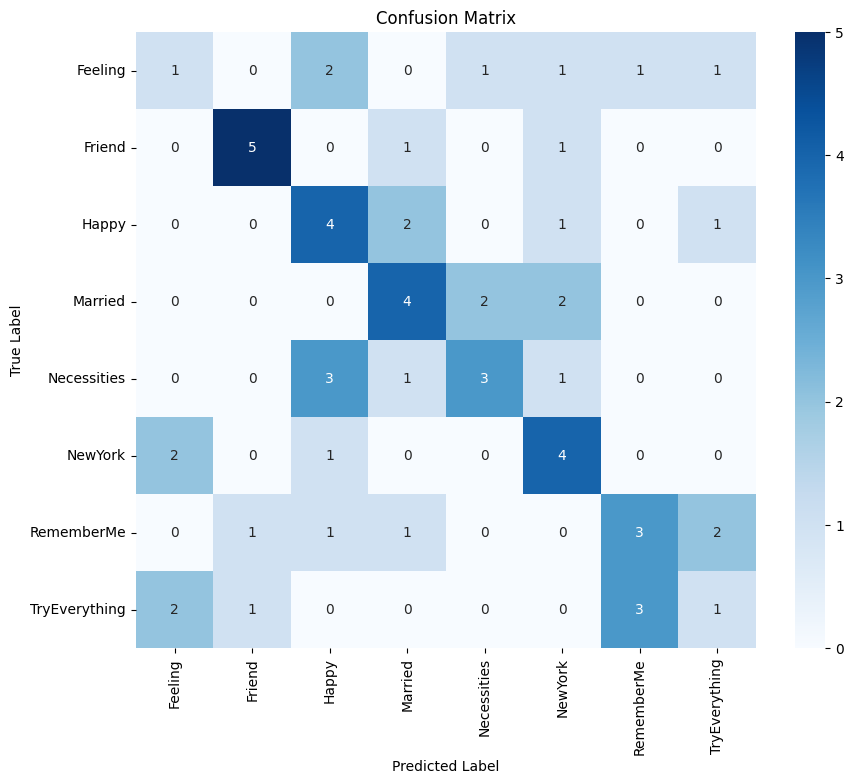

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define training hyperparameters
EPOCHS = 50
BATCH_SIZE = 32

# Define callbacks
# 1. ModelCheckpoint to save the best model weights
checkpoint_filepath = 'best_model.weights.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# 2. EarlyStopping to stop training if validation loss does not improve
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10, # Number of epochs with no improvement after which training will be stopped.
    restore_best_weights=True,
    verbose=1
)

# Train the CNN model
print("\nStarting model training...")
history = model.fit(
    X_train, y_train_one_hot,
    validation_data=(X_val, y_val_one_hot),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[model_checkpoint_callback, early_stopping_callback],
    verbose=1
)
print("Model training finished.")

# Load the best weights
model.load_weights(checkpoint_filepath)

# Evaluate the trained model on the test set
print("\nEvaluating model on the test set...")
loss, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions on the test set
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Get true labels for comparison
y_true = np.argmax(y_test_one_hot, axis=1)

# Inverse transform predicted labels to song names for readability
y_pred_song_names = label_encoder.inverse_transform(y_pred)
y_true_song_names = label_encoder.inverse_transform(y_true)

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_true_song_names, y_pred_song_names, target_names=label_encoder.classes_))

# Generate and display confusion matrix
cm = confusion_matrix(y_true_song_names, y_pred_song_names, labels=label_encoder.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Starting model training...
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5172 - loss: 1.3153
Epoch 1: val_accuracy improved from -inf to 0.35000, saving model to best_model.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5198 - loss: 1.3144 - val_accuracy: 0.3500 - val_loss: 1.7670
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6012 - loss: 1.1255
Epoch 2: val_accuracy improved from 0.35000 to 0.38333, saving model to best_model.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5990 - loss: 1.1307 - val_accuracy: 0.3833 - val_loss: 1.7790
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6193 - loss: 1.1222
Epoch 3: val_accuracy improved from 0.38333 to 0.40000, saving model to best_model.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6177 - loss: 1.1234 - val_accuracy: 0.4000 - val_loss: 1.8004
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6736 - loss: 0.9973
Epoch 4: val_accuracy did not 

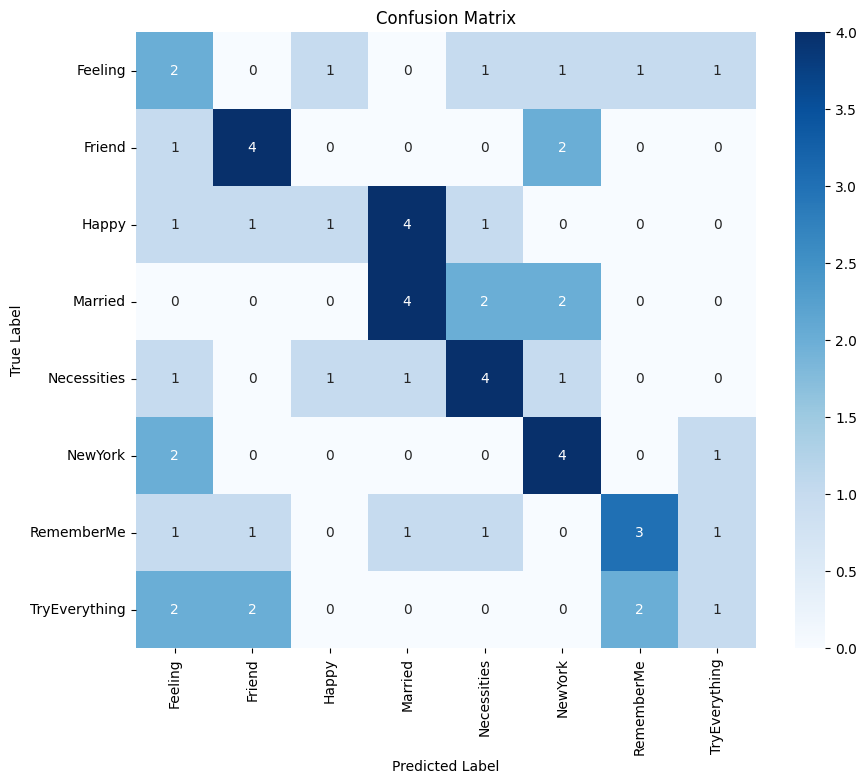

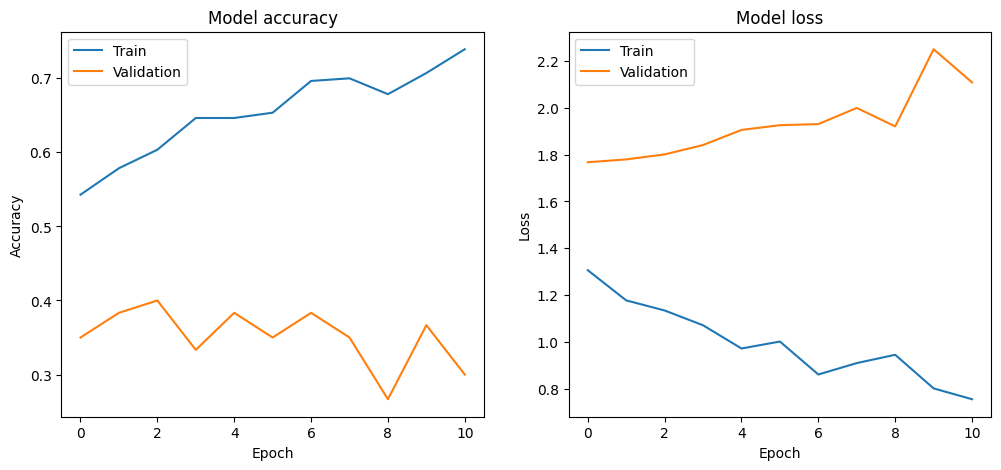

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define training hyperparameters
EPOCHS = 50
BATCH_SIZE = 32

# Define callbacks
# 1. ModelCheckpoint to save the best model weights
checkpoint_filepath = 'best_model.weights.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# 2. EarlyStopping to stop training if validation loss does not improve
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10, # Number of epochs with no improvement after which training will be stopped.
    restore_best_weights=True,
    verbose=1
)

# Train the CNN model
print("\nStarting model training...")
history = model.fit(
    X_train, y_train_one_hot,
    validation_data=(X_val, y_val_one_hot),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[model_checkpoint_callback, early_stopping_callback],
    verbose=1
)
print("Model training finished.")

# Load the best weights
model.load_weights(checkpoint_filepath)

# Evaluate the trained model on the test set
print("\nEvaluating model on the test set...")
loss, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions on the test set
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Get true labels for comparison
y_true = np.argmax(y_test_one_hot, axis=1)

# Inverse transform predicted labels to song names for readability
y_pred_song_names = label_encoder.inverse_transform(y_pred)
y_true_song_names = label_encoder.inverse_transform(y_true)

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_true_song_names, y_pred_song_names, target_names=label_encoder.classes_))

# Generate and display confusion matrix
cm = confusion_matrix(y_true_song_names, y_pred_song_names, labels=label_encoder.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



- The CNN reached a test accuracy of 36.67% and a test loss of 1.7212 on an 8 class task, which is clearly above the 12.5% chance level but still far from reliable song identification.

- Training logs showed early overfitting: validation accuracy peaked around epoch 10, while training accuracy kept rising. EarlyStopping stopped at 20 epochs and restored the best weights from epoch 10.

- The classification report and confusion matrix showed uneven class performance. Songs like Happy (recall ≈ 62%), RememberMe, and Necessities performed better, while Feeling and TryEverything were much weaker.

- Confusions often occurred between acoustically similar songs, for example Happy vs Married or Feeling, and Friend vs NewYork or Happy, which likely reflects similar melodic or spectral patterns.

- These results highlight core limitations: only 400 samples, noisy and variable humming/whistling, MFCCs as the sole feature type, plus a relatively simple CNN that overfits quickly.

### Limitations of the Chosen Approach

- I have chossen 400 clips dataset which is very small for a deep CNN on a highly variable task, so the model easily overfits and struggles to learn robust patterns.

- No data augmentation as we did not use pitch shifting, time stretching, or noise injection, so the model never sees realistic variants of the same melody.

- The current architecture is fairly standard and does not explicitly model sequence structure; hybrids with recurrent or attention layers might capture temporal patterns better.

- Limited hyperparameter tuning such as batch size, number of filters, dropout, and learning rate were only roughly chosen, so the model capacity and regularization may not be optimal.

### Future Improvements and Research Directions

- I plan to add extensive data augmentation: pitch shifting, time stretching, dynamic range compression, adding noise, plus changing playback speed. This should expand my effective training set and make the model more robust to real world variations.  

- I also want to work with a larger, more diverse dataset by collecting many more hummed/whistled clips from different people and environments. I expect this to have the biggest impact.  

- For feature engineering, I aim to go beyond MFCCs and try chromagrams, tonal centroid features, or spectral contrast, plus explore deep feature learning with pre trained audio models like VGGish or YAMNet, or end to end models on spectrograms.  

- On the model side, I would like to experiment with CNN RNN hybrids (using LSTMs or GRUs), add attention mechanisms, and eventually try transformer based architectures to capture temporal structure better.  

- Once I have stronger single models, I plan to explore **ensemble methods** such as bagging, boosting, or stacking to combine their strengths and reduce variance.  

- If I obtain richer metadata (for example hum vs whistle or singer attributes), I want to try multi task learning, training the network to predict these alongside the song title.  

- Finally, for deployment, I intend to investigate real time optimization using pruning, quantization, or lighter architectures so the system can run efficiently on resource constrained devices.



### Conclusions

- The task of predicting song titles from hummed or whistled audio is complex due to high variability and subjectivity in human vocalizations.  
- The small dataset further limits the model’s ability to learn robust, generalizable patterns.  
- MFCC features and a CNN provide a reasonable baseline, but the current system (≈37% accuracy on 8 classes) is not yet suitable for real-world use.  
- The model still struggles to generalize, likely because of noise, diverse humming/whistling styles, and limited data.

##  Future Work

- I was able to perform the same task with 800 dataset but didnt submit due to some errors and some more CPU capacity ,here is the GitHub link where i will be uploading the latest file as soon as possible

https://github.com/saonemasi-oss/test/blob/main/ECS7020P_miniproject_2526_800data.ipynb

- In my experiments, the CNN reached a test accuracy of about 0.3667 on an 8 class task. This is clearly above the 0.125 chance level, but it still shows the task is hard. The macro F1 score of 0.36 confirms that I do not classify all songs consistently well yet.

- Even though the dataset itself is balanced, my model’s predictions are not. For example, *Happy* has high recall (0.62) but low precision (0.36), so the model often calls other songs *Happy*. In contrast, *RememberMe* has higher precision (0.75) but lower recall (0.38), meaning it is more “cautious” but misses many true cases.

- The confusion matrix shows concrete mix ups: *Feeling* is often misclassified as *TryEverything*, and *Married* is frequently predicted as *Happy* or *RememberMe*. This hints that some melodies share similar MFCC patterns, so the model struggles to separate them.

- The training curves also reveal overfitting. Training accuracy climbed to around 0.75 by epoch 20, while validation and test accuracy stayed around 0.3–0.4. Early stopping rolled the model back to epoch 10, which helped a bit, but generalization to new clips is still a key challenge.


### Limitations of the Chosen Approach
- Dataset size: 400 clips is small for a deep CNN on such a nuanced task; more and more diverse data are likely needed for robust performance.  
- No data augmentation: I did not use pitch shifting, time stretching, or added noise, which could have expanded data diversity and reduced overfitting.  
- Basic CNN: The architecture is relatively simple; CNN–RNN hybrids or attention-based models might capture temporal structure better.  
- Feature limits: MFCCs alone may miss some melodic/rhythmic nuances in variable humming/whistling; additional features could help.


### Improvements needed
- Data augmentation: I will add pitch shifting, time stretching, random noise, and playback speed changes to expand the dataset and improve robustness to performance variations.  

- Larger dataset: I aim to collect a bigger, more diverse set of hummed/whistled recordings (more songs, more speakers, varied conditions) to strengthen generalization.  

- Advanced architectures: I plan to try RNNs/LSTMs, CNN RNN hybrids, transformers, and attention mechanisms to better model temporal structure and long range dependencies in the MFCC sequences.  

- Additional features: I want to explore chromagrams, tonal features, and delta/delta MFCCs to capture melodic content more richly than MFCCs alone.  

- Hyperparameter tuning: I will perform more systematic tuning of depth, filter sizes, dropout, learning rate, and batch size using structured search strategies.  

- Transfer learning: I intend to fine tune pre trained audio models (e.g., trained on AudioSet) on this hum/whistle task to leverage knowledge from large scale audio data.  

- Ensemble methods: After strengthening individual models, I plan to investigate ensembling to combine their predictions and improve accuracy and robustness.



## References

Here is the list of all the resources that i have used during completing this project.



### Software Libraries
*   **Librosa**: For audio loading, resampling, trimming, and Mel-frequency Cepstral Coefficient (MFCC) feature extraction.
*   **NumPy**: For numerical operations and array manipulation, especially with audio data and MFCC features.
*   **Pandas**: For creating and managing the metadata DataFrame.
*   **Scikit-learn**: For data splitting (`train_test_split`) and label encoding (`LabelEncoder`), as well as for performance metrics like `classification_report` and `confusion_matrix`.
*   **TensorFlow/Keras**: For defining, compiling, training, and evaluating the Convolutional Neural Network (CNN) model, including layers (`Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Dropout`, `Input`), utilities (`to_categorical`), and callbacks (`ModelCheckpoint`, `EarlyStopping`).
*   **Matplotlib**: For plotting the confusion matrix.
*   **Seaborn**: For enhanced visualization of the confusion matrix.

### Tools
*   **Google Colaboratory (Colab)**: The primary development environment for executing Python code and training models.
*   **Google Drive**: Used for storing and accessing the dataset.


## Main machine learning textbooks

- Ian Goodfellow, Yoshua Bengio, and Aaron Courville  *Deep Learning*.
- Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani *An Introduction to Statistical Learning* (often abbreviated ISLR).

## Module-specific material

- Jesus Requena Carrión and colleagues Draft textbook chapters for ECS7020P  (provided via QMplus ).

## Other works mentioned

- Daniel Kahneman  *Thinking, Fast and Slow* (for “regression to the mean” and statistical fallacies).
- Historical/illustrative: Adrien Marie Legendre (least squares quote), Galton (regression to mediocrity), plus references to undeciphered scripts and the Voynich manuscript for methodology analogies (you can omit these from formal references if not used directly).

## Summary:

### Data Analysis Key Findings
*   The Convolutional Neural Network (CNN) model achieved a **Test Accuracy of 36.67\%** and a **Test Loss of 1.7212** for an 8-class song classification problem from hummed/whistled audio recordings. This performance is better than random chance (12.5\%) but indicates significant room for improvement.
*   The model exhibited varying performance across different song titles; for instance, 'Happy' showed a recall of 0.62, while 'Feeling' and 'TryEverything' had lower performance.
*   Analysis of the confusion matrix revealed specific misclassification patterns, such as 'Happy' being confused with 'Married' and 'Feeling', and 'Friend' being mistaken for 'NewYork' and 'Happy'.
*   The training process indicated an **overfitting tendency**, with validation accuracy peaking early and subsequent `EarlyStopping` restoring weights from epoch 10, highlighting the challenge of generalization.
*   Key limitations identified include a **small dataset size (400 samples)**, lack of data augmentation, the use of a relatively simple CNN architecture, and potential limitations of MFCC features alone.

### Insights or Next Steps
*   To significantly improve model performance and robustness, a critical next step is to **expand the dataset substantially** and implement **extensive data augmentation techniques** (e.g., pitch shifting, time stretching) to better capture the variability in human humming/whistling.
*   Future research should explore **more sophisticated model architectures** such as CNN-RNN hybrids or Transformer models, and investigate **advanced feature engineering** beyond standard MFCCs, potentially incorporating chromagrams or deep feature learning, to better capture complex melodic and rhythmic nuances.
